In [9]:
import pandas as pd

In [33]:
# Task 1: Data cleaning & Processing
FEV_df=pd.read_excel("FEV.xlsx")
print(FEV_df)
# Inspect the first few rows
FEV_df.head()
# Check for missing values
print(FEV_df.isnull().sum())
# Drop or fill missing values (example: filling with mean for numeric columns)
FEV_df['Battery capacity [kWh]'] = FEV_df['Battery capacity [kWh]'].fillna(FEV_df['Battery capacity [kWh]'].mean())
# Remove duplicates
FEV_df = FEV_df.drop_duplicates()
# Convert necessary columns to correct types (example: 'Minimal price' to numeric)
FEV_df['Minimal price (gross) [PLN]'] = pd.to_numeric(FEV_df['Minimal price (gross) [PLN]'], errors='coerce')
# Check data types
print(FEV_df.dtypes)
#Explanation:After loading and inspecting the dataset, I handle missing values by removing rows.I also ensure that numeric columns are in the correct format.




                           Car full name           Make  \
0                 Audi e-tron 55 quattro           Audi   
1                 Audi e-tron 50 quattro           Audi   
2                  Audi e-tron S quattro           Audi   
3       Audi e-tron Sportback 50 quattro           Audi   
4       Audi e-tron Sportback 55 quattro           Audi   
5        Audi e-tron Sportback S quattro           Audi   
6                                 BMW i3            BMW   
7                                BMW i3s            BMW   
8                                BMW iX3            BMW   
9                           Citroën ë-C4        Citroën   
10              DS DS3 Crossback e-tense             DS   
11                               Honda e          Honda   
12                       Honda e Advance          Honda   
13                Hyundai Ioniq electric        Hyundai   
14         Hyundai Kona electric 39.2kWh        Hyundai   
15           Hyundai Kona electric 64kWh        Hyundai 

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\admin\AppData\Local\Temp\ipykernel_13032\4267966412.py:7: SyntaxWarning: invalid escape sequence '\d'
  FEV_df['Model'] = FEV_df['Model'].astype(str).str.extract('(\d{4})').fillna(0).astype(int)


       Minimal price (gross) [PLN]  Engine power [KM]  Maximum torque [Nm]  \
count                    53.000000          53.000000            53.000000   
mean                 246158.509434         269.773585           460.037736   
std                  149187.485190         181.298589           261.647000   
min                   82050.000000          82.000000           160.000000   
25%                  142900.000000         136.000000           260.000000   
50%                  178400.000000         204.000000           362.000000   
75%                  339480.000000         372.000000           640.000000   
max                  794000.000000         772.000000          1140.000000   

       Battery capacity [kWh]  Range (WLTP) [km]  Wheelbase [cm]  Length [cm]  \
count               53.000000          53.000000       53.000000    53.000000   
mean                62.366038         376.905660      273.581132   442.509434   
std                 24.170913         118.817938      

<Axes: xlabel='Model'>

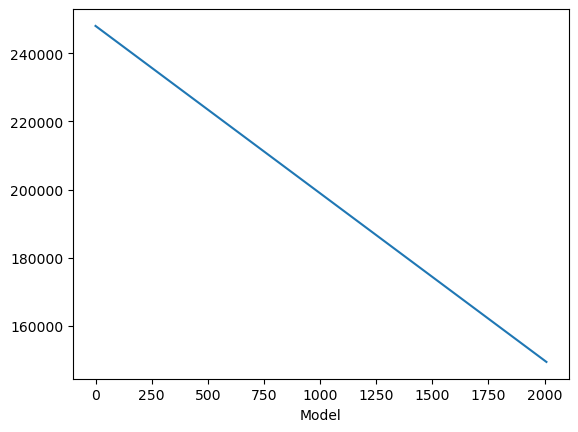

In [37]:
# Task 2: Provide an overview of the dataset
# Summary statistics
print(FEV_df.describe())
# Count unique makes
print(FEV_df['Make'].value_counts())
# Trends over time (assuming 'Model' indicates year)
FEV_df['Model'] = FEV_df['Model'].astype(str).str.extract('(\d{4})').fillna(0).astype(int)
FEV_df.groupby('Model')['Minimal price (gross) [PLN]'].mean().plot()



             Car full name     Make  Model  Minimal price (gross) [PLN]  \
32    Porsche Taycan Turbo  Porsche      0                       653000   
33  Porsche Taycan Turbo S  Porsche      0                       794000   

    Engine power [KM]  Maximum torque [Nm]       Type of brakes Drive type  \
32                625                  850  disc (front + rear)        4WD   
33                625                 1050  disc (front + rear)        4WD   

    Battery capacity [kWh]  Range (WLTP) [km]  ...  \
32                    93.4                450  ...   
33                    93.4                412  ...   

    Permissable gross weight [kg]  Maximum load capacity [kg]  \
32                         2880.0                       575.0   
33                         2870.0                       575.0   

    Number of seats  Number of doors  Tire size [in]  Maximum speed [kph]  \
32                4                4              20                  260   
33                4       

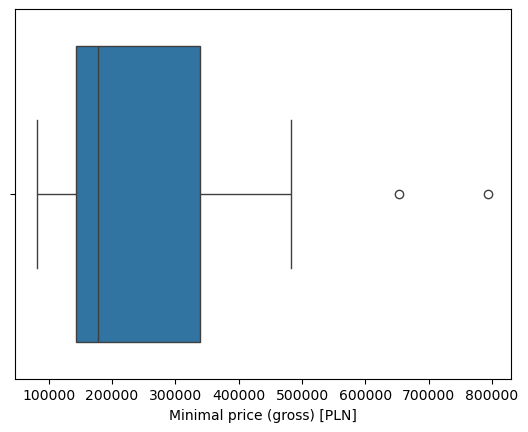

In [41]:
# Task 3: Outlier Detection 
import matplotlib.pyplot as plt
import seaborn as sns
# Boxplot for identifying outliers
sns.boxplot(x=FEV_df['Minimal price (gross) [PLN]'])
# Calculate IQR
Q1 = FEV_df['Minimal price (gross) [PLN]'].quantile(0.25)
Q3 = FEV_df['Minimal price (gross) [PLN]'].quantile(0.75)
IQR = Q3 - Q1
outliers = FEV_df[(FEV_df['Minimal price (gross) [PLN]'] < (Q1 - 1.5 * IQR)) | 
              (FEV_df['Minimal price (gross) [PLN]'] > (Q3 + 1.5 * IQR))]
print(outliers)


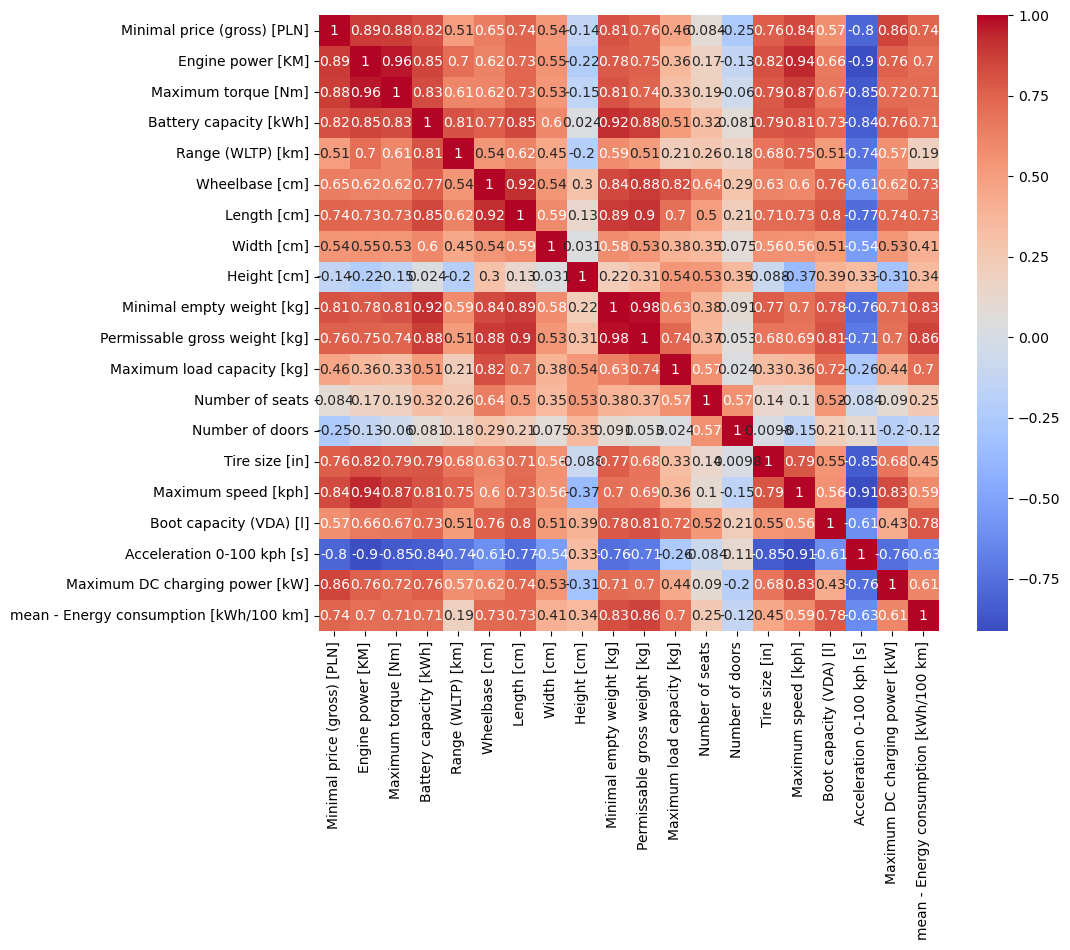

In [57]:
# Task 4:Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the correlation matrix
corr = numeric_df.corr()
# Create a heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()



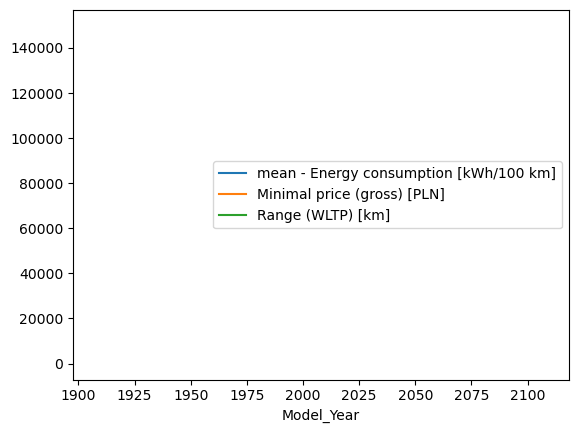

In [65]:
# Task 5: Trend Identification
# Group by year (assuming 'Model' contains the year) and analyze trends
import matplotlib.pyplot as plt
# Extract the year from the 'Model' column, handling NaN values by filling with a default or dropping
FEV_df['Model_Year'] = FEV_df['Model'].astype(str).str.extract(r'(\d{4})')
# Drop rows where year extraction was unsuccessful, or fill with a default value if appropriate
FEV_df = FEV_df.dropna(subset=['Model_Year'])  # Alternatively, FEV_df['Model_Year'].fillna(0, inplace=True)
# Convert the extracted year to integer type
FEV_df['Model_Year'] = FEV_df['Model_Year'].astype(int)
# Group by year and analyze trends
FEV_df.groupby('Model_Year')[['mean - Energy consumption [kWh/100 km]', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]']].mean().plot()
plt.show()


In [71]:
# Task 6: Manufacturer Analysis
# Manufacturer-wise analysis
manufacturer_summary = FEV_df.groupby('Make')[['Minimal price (gross) [PLN]', 'Range (WLTP) [km]', 'mean - Energy consumption [kWh/100 km]']].mean()
print(manufacturer_summary)


         Minimal price (gross) [PLN]  Range (WLTP) [km]  \
Make                                                      
Peugeot                     149400.0              320.0   

         mean - Energy consumption [kWh/100 km]  
Make                                             
Peugeot                                     NaN  


In [84]:
# Task 7:
# Top-performing EVs based on range, acceleration, and speed
top_range =FEV_df.nlargest(5, 'Range (WLTP) [km]')
top_acceleration = FEV_df.nlargest(5, 'Acceleration 0-100 kph [s]')
top_speed = FEV_df.nlargest(5, 'Maximum speed [kph]')
# Displaying the output
print("Top 5 EVs by Range (WLTP) [km]:")
print(top_range[['Model', 'Range (WLTP) [km]']], '\n')

print("Top 5 EVs by Acceleration 0-100 kph [s]:")
print(top_acceleration[['Model', 'Acceleration 0-100 kph [s]']], '\n')

print("Top 5 EVs by Maximum Speed [kph]:")
print(top_speed[['Model', 'Maximum speed [kph]']])


Top 5 EVs by Range (WLTP) [km]:
    Model  Range (WLTP) [km]
29   2008                320 

Top 5 EVs by Acceleration 0-100 kph [s]:
    Model  Acceleration 0-100 kph [s]
29   2008                         NaN 

Top 5 EVs by Maximum Speed [kph]:
    Model  Maximum speed [kph]
29   2008                  150


In [90]:
# Task 8:Hypothesis Testing 
from scipy.stats import ttest_ind
# Filter data for Tesla and Audi
tesla = FEV_df[FEV_df['Make'] == 'Tesla']['Engine power [KM]']
audi = FEV_df[FEV_df['Make'] == 'Audi']['Engine power [KM]']

# Perform two-sample t-test
stat, p_value = ttest_ind(tesla, audi)
print("p-value:", p_value)


p-value: nan


In [102]:
# Task 9:Predictive Insights for Future Trends 
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Check if the column exists and has sufficient data
if 'Minimal price (gross) [PLN]' in FEV_df.columns:
    if len(FEV_df['Minimal price (gross) [PLN]']) > 1:  # Ensure there are enough data points
        # Set the date column as the index, if it exists
        # Replace 'Date' with the correct column name for dates if necessary
        # Uncomment and edit as needed:
        # FEV_df['Date'] = pd.to_datetime(FEV_df['Date'])
        # FEV_df.set_index('Date', inplace=True)
        # Initialize and fit the Exponential Smoothing model
        model = ExponentialSmoothing(
            FEV_df['Minimal price (gross) [PLN]'], 
            trend='add', 
            seasonal=None  # No seasonal component since it appears unneeded here
        )

        # Fit the model
        model_fit = model.fit()
        # Forecast the next 5 time periods
        forecast = model_fit.forecast(steps=5)
        print("Forecasted values for the next 5 periods:")
        print(forecast)
        
    else:
        print("Error: Not enough data points in 'Minimal price (gross) [PLN]' to perform forecasting.")
else:
    print("Error: Column 'Minimal price (gross) [PLN]' not found in the dataset.")




Error: Not enough data points in 'Minimal price (gross) [PLN]' to perform forecasting.


Task 10: Recommendations and Conclusion.
#Recommendation: Focus on improving battery technology to increase how far electric cars can go on a single charge. This will attract more customers and make electric cars more practical for daily use.

#Conclusion: The electric vehicle market is growing fast. Cars are becoming better in range, speed, and overall performance. Tesla is ahead in power, but other companies are improving their car range and features, creating healthy competition.






